## [89. Gray Code](https://leetcode.com/problems/gray-code/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

`gray code`是一个二进制的数字系统, 其中两个连续的值只有一位不一样.

给定一个非负的整数`n`标识编码中的总位数, 打印出`gray code`的序列. `gray code`序列必须从`0`开始.

**示例1**
```
Input: 2
Output: [0,1,3,2]
Explanation:
00 - 0
01 - 1
11 - 3
10 - 2

对于一个给定的 n, gray code 序列可能并不是唯一的.
例如, [0,2,3,1] 也是一个有效的gray code序列.

00 - 0
10 - 2
11 - 3
01 - 1
```

**示例2**
```
Input: 0
Output: [0]
解释: 我们将 gray code 序列定义为从0开始. 一个n的gray code 序列长度为2^n, 那么对于 n = 0, 其大小为 2^0 = 1.因此, 对于 n = 0, gray code序列为: [0].
```

### 解题思路

从示例中, 我们可以知道: 对于`n`应该要有`2^n`个元素. 找找规律:


参考[维基百科](https://zh.wikipedia.org/wiki/%E6%A0%BC%E9%9B%B7%E7%A0%81)中得到以下几种方法:

**直接排列法**:

> 以二进制为0值的格雷码为第零项，第一项改变最右边的位元，第二项改变右起第一个为1的位元的左边位元，第三、四项方法同第一、二项，如此反复，即可排列出n个位元的格雷码。

尝试理解一下:
当`n=3`时, `gray code`序列为:
```
000 - 0 
001 - 1
011 - 3 
010 - 2
110 - 6
111 - 7
101 - 5
100 - 4
```

**镜面对称法**

> n位元的格雷码可以从n-1位元的格雷码以上下镜射后加上新位元的方式快速得到，如下图所示:
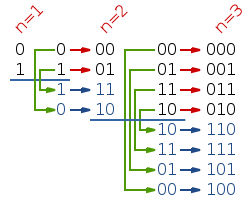

**二进制数转格雷码**

根据定义, 得到公式:

`G(n) = B(n) Xor B(n+1)` 即: `G(n) = B(n) + B(n+1)`

其中`n`表示第`n`位, `B(n)`表示二进制的第`n`位, `G(n)`表示格雷码的第`n`位.

In [1]:
class Solution(object):
    # gray to binary
    def grayCode(self, n):
        """
        :type n: int
        :rtype: List[int]
        """
        if n == 0:
            return [0]
        ans = list()
        total_iter = 1
        for i in range(n-1):
            total_iter *= 2 
        iter = 0
        code_arr = [0 for _ in range(n)]
        while iter < total_iter:
            ans.append(self.convert(code_arr))
            code_arr[-1] = 1 - code_arr[-1]
            ans.append(self.convert(code_arr))
            end = n - 1
            while end > 0 and code_arr[end] == 0:
                end -= 1
            if end >= 1:
                code_arr[end-1] = 1 - code_arr[end-1]
            iter += 1
        return ans
        
    def convert(self, arr):
        num = 0
        now_num = 1
        for i in range(len(arr)-1 , -1, -1):
            num += arr[i] * now_num
            now_num *= 2
        return num
    
    def grayCodeMirror(self, n):
        """
        :type n: int
        :rtype: List[int]
        """
        if n == 0:
            return [0]
        if n == 1:
            return [0, 1]
        arr = self.grayCodeMirror(n-1)
        ans = [0 for i in range(2*len(arr))]
        pow_val = 1
        for _ in range(n-1):
            pow_val *= 2
        for i in range(len(arr)):
            ans[i] = arr[i]
            ans[len(arr) + i] = arr[len(arr)-i-1] + pow_val
        return ans

In [22]:
n = 2
s = Solution()
print s.grayCodeMirror(n)

[0, 1, 3, 2]


## [90-Subsets II](https://leetcode.com/problems/subsets-ii/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个可能包含重复数字的整数集合`nums`, 返回所有可能的子集(幂集).

**注意**: 返回集合中不能包含重复的子集.

**示例**
```
Input: [1,2,2]
Output:
[
  [2],
  [1],
  [1,2,2],
  [2,2],
  [1,2],
  []
]
```

### 解题思路

这个题目与之前的[78-Subsets](https://leetcode.com/problems/subsets/description/)类似, 唯一不同在于: 这道题目中数组有可能包含重复的数字, 其实按照之前拿到题目的解法, 将数组存储在`dict`中, 还是能解决这个问题的.

可以根据数组长度进行划分, 以`[1,2,2]`为例:
- 长度为`0`: `[]`
- 长度为`1`: `[1], [2]`
- 长度为`2`: `[1,2], [2,2]`
- 长度为`3`: `[1,2,2]`

由于数组中可能包含重复的数字, 那么我们需要先对列表排个序. 

总的说来, 还是一个递归法, 例如, 针对长度为`2`时, 需要依赖长度为`1`的数据:
- 对于`[1]`, 从它的下一位开始, 加入到`[1]`后面: `[1,2]`
- 对于`[2]`, 发现它是一个重复的字符, 那么就需要判断是否加入重复字符:
    - 如果当前列表中`2`的出现次数已经到了`2`的总数, 那么就不加了
    - 否则, 需要加, 此时: 新增`[2,2]`

因此, 需要预先存储两个字典, 分别存储`num`对应的最后一位位置以及`num`出现的次数, 用来决定是否添加重复字符以及从哪个列表开始添加.

### 代码

In [5]:
class Solution(object):
    def subsetsWithDup(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        total_ans = list()
        if len(nums) == 0:
            return total_ans
        ans = list()
        n = len(nums)
        nums.sort()
        pos_dict = dict()
        dup_dict = dict()
        for i in range(len(nums)):
            if nums[i] in pos_dict:
                num = 1
                if nums[i] in dup_dict:
                    num += dup_dict[nums[i]]
                else:
                    num += 1
                dup_dict[nums[i]] = num
            pos_dict[nums[i]] = i
        for k in range(n + 1):
            ans = self.combineArr(nums, n, k, pos_dict, dup_dict, ans)
            total_ans += ans
        return total_ans

    def combineArr(self, nums, n, k, pos_dict, dup_dict, ans):
        new_list = list()
        if k == 0:
            return [[]]
        if k == 1:
            return [[key] for key in pos_dict]
        for i in range(len(ans)):
            arr = ans[i]
            if arr[-1] in dup_dict:
                max_cnt = dup_dict[arr[-1]]
                cnt = 0
                for i in range(len(arr)):
                    if arr[i] == arr[-1]:
                        cnt += 1
                if cnt < max_cnt:
                    new_list.append(arr + [arr[-1]])
            start = pos_dict[arr[-1]] + 1
            while start < n:
                now_num = nums[start]
                new_arr = arr + [now_num]
                new_list.append(new_arr)
                start = pos_dict[now_num] + 1
        return new_list

In [6]:
nums = [1,2,2]
s = Solution()
print(s.subsetsWithDup(nums))

[[], [1], [2], [1, 2], [2, 2], [1, 2, 2]]


## [91-Decode Ways](https://leetcode.com/problems/decode-ways/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

包含`A-Z`的字符的信息使用下面的映射编码到数字:
```
'A' -> 1
'B' -> 2
...
'Z' -> 26
```

给定一个只包含数字的**非空**字符串, 返回对其进行解码的总数.

**示例1**
```
Input: "12"
Output: 2
解释: 其可以被解码为 "AB" (1 2) 或者 "L" (12).
```

**示例2**
```
Input: "226"
Output: 3
解释: 可以被解码为 "BZ" (2 26), "VF" (22 6), 或者 "BBF" (2 2 6).
```

### 解题思路

这个题目可以使用递归的思想去看, 例如, 针对`226`:

- 开头可以是`2`, 那么需要看`26`有几种对应方式, 由于`len("26") <= 2`, 那么就不用遍历了, 它只可能是`1`种或者是`2`种情况: 当`int(x) < = 26`的时候, 有两种情况: `x/10 x%10`或者是`x`, 返回`2`, 否则的话, 只有一种情况: `x/10 x%10`; 此时`26`返回`2`
- 开头也可以是`26`, 那么只需要看`6`, 只有一种情况

因此一共有`1+2=3`种情况.

**注意:** 特别要关注包含`0`的情况, `0`是不能当做编码的. 

一个悲伤的消息... 这种情况超出时间限制了, 得优化时间复杂度

看下代码, 发现其实有地方是重复计算了的 `return self.numDecodings(s[1:]) +  self.numDecodings(s[2:])`, 所以考虑是不是可以把已经计算过的数值先存储起来.


**动态规划**

使用一个长度为`n+1`的`memo`数组记录从右往左数到第`i`位开始有多少种组合(初始化均为`1`), 初始化`i=n-1`,有以下几种情况:

当`i>=0`时:
- 如果`s[i] == "0"`, 那么:
 - 如果`i < 1 or s[i-1]  not in ["1", "2"]`, 那么直接返回`0`
 - 否则`memo[i] = 0, memo[i-1] = memo[i+1] i -= 2`
- 如果`i < n-1 and int(s[i:i+2]) <= 26`, 那么 `memo[i] = memo[i+1]+memo[i+2] i-=1`
- 否则`memo[i] = memo[i+1] i-=1`

最后返回`memo[0]`即可, 时间复杂度为`O(n)`.

> 写在后面的一点话: 这道题目`wrong answer`了好多次, 最后超出时间限制了. 后来看了下自己的代码, 发现问题主要出现在重复计算上, 因此想到可以将已经计算好的东西存储起来. 所以以后遇到问题的时候可以多思考, 多想想.

### 代码


In [5]:
class Solution(object):
    def numDecodings(self, s):
        """
        :type s: str
        :rtype: int
        """
        if s[0] == "0":
            return 0
        if len(s) == 1:
            if s == "0":
                return 0
            else:
                return 1
        if len(s) == 2:
            if int(s) <= 26:
                return 1 + self.numDecodings(s[0]) * self.numDecodings(s[1])
            else:
                return self.numDecodings(s[0]) * self.numDecodings(s[1])
        start = int(s[:2])
        if start <= 26:
            # have two choice
            return self.numDecodings(s[1:]) +  self.numDecodings(s[2:])
        else:
            return self.numDecodings(s[1:])
        
    # dynamic programming
    def numDecodingsDP(self, s):
        """
        :type s: str
        :rtype: int
        """
        n = len(s)
        memo = [1 for _ in range(n+1)]
        i = n - 1
        while i >= 0:
            if s[i] == "0":
                if i < 1 or s[i-1] not in ["1", "2"]:
                    return 0
                else:
                    memo[i] = 0
                    memo[i-1] = memo[i+1]
                    i -= 2
            elif i < n - 1 and int(s[i: i+2]) <= 26:
                memo[i] = memo[i+1] + memo[i+2]
                i -= 1
            else:
                memo[i] = memo[i+1]
                i -= 1
        return memo[0]

In [6]:
s = "226"
sl = Solution()
print(sl.numDecodingsDP(s))

3


## [92-Reverse Linked List II](https://leetcode.com/problems/reverse-linked-list-ii/description/)

### 问题描述

将一个链表`m`到`n`的位置进行反转, 一步完成这个过程.

注意: `1 ≤ m ≤ n ≤ length of list`.

**示例**

```
Input: 1->2->3->4->5->NULL, m = 2, n = 4
Output: 1->4->3->2->5->NULL
```

### 解题思路

需要使用三个指针:
 - `pre`指向第`m-1`个数
 - `now`指向当前的数
 - `after`指向当前的下一个数
 
 遍历的时候需要进行如下的操作:
 - `now.next = after.next`
 - `after.next = pre.next`
 
 这种题目的重点是思考清楚指针的移动和指向问题即可.
 
 ### 代码



In [1]:
# Definition for singly-linked list.
class ListNode(object):
    def __init__(self, x):
        self.val = x
        self.next = None

class Solution(object):
    def reverseBetween(self, head, m, n):
        """
        :type head: ListNode
        :type m: int
        :type n: int
        :rtype: ListNode
        """
        pre = ListNode(0)
        ans = ListNode(0)
        pre.next = head
        ans.next = pre
        while m > 1:
            pre = pre.next
            m -= 1
            n -= 1
        if pre is not None:
            now = pre.next
        while n>1 and now is not None:
            after = now.next
            now.next = after.next
            after.next = pre.next
            pre.next = after
            n -= 1
        return ans.next.next

In [2]:
a = ListNode(1)
b = ListNode(2)
c = ListNode(3)
d = ListNode(4)
e = ListNode(5)

a.next = b
b.next = c
c.next = d
d.next = e

s = Solution()
ans = s.reverseBetween(a, 2, 4)
while ans is not None:
    print(ans.val)
    ans = ans.next

1
4
3
2
5


## [93-Restore IP Addresses](https://leetcode.com/problems/restore-ip-addresses/description/)

问题难度: &clubs; &clubs; &clubs;

### 问题描述

给定一个只包含数字的字符串, 返回其所有可能组成的有效`ip`地址.

**示例**
```
Input: "25525511135"
Output: ["255.255.11.135", "255.255.111.35"]

```

### 解题思路

这个题目与[91-Decode Ways](https://leetcode.com/problems/decode-ways/)有点类似, 区别如下:

- `26`改成了`255`
-  允许单个`0`
- 只能分割成4段

